In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [72]:
df = pd.read_csv("chart_jugadores.csv", sep=";")

In [73]:
df.dtypes #empieza mas adelante en el tiempo, habria que filtrarla y demas.

DateTime     object
Players     float64
dtype: object

In [74]:
jugadores_MHW = df[df["Players"] > 20] #quito las que sean inferiores a 20, porque son datos erroneos o innecesarios.

In [75]:
jugadores_MHW #ahora tenemos algo ams cercano a la fecha de salida. 

,DateTime,Players
360,2018-08-09 00:00:00,240872.0
361,2018-08-10 00:00:00,289952.0
362,2018-08-11 00:00:00,318440.0
363,2018-08-12 00:00:00,334684.0
364,2018-08-13 00:00:00,320909.0
...,...,...
2251,2023-10-13 00:00:00,36211.0
2252,2023-10-14 00:00:00,39775.0
2253,2023-10-15 00:00:00,37860.0
2254,2023-10-16 00:00:00,33902.0


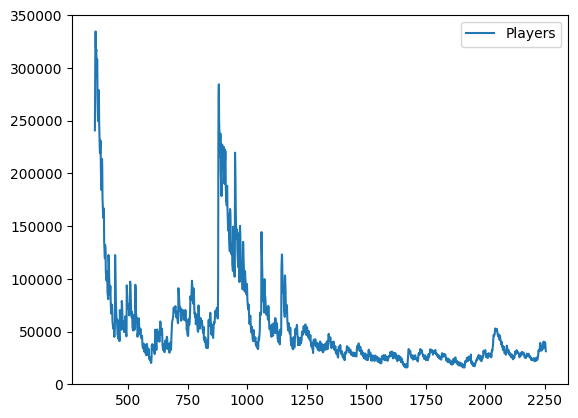

In [76]:
jugadores.plot();

In [77]:
seguidores_MHW = pd.read_csv("chart_seguidores.csv", sep=";")

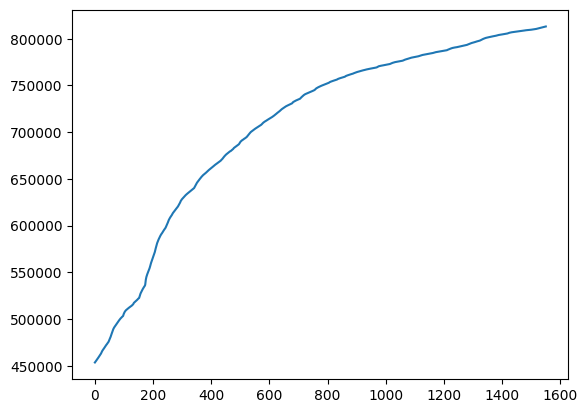

In [78]:
seguidores_MHW["Followers"].plot(); #grafico de seguidores

In [79]:
jugadores_LA = pd.read_csv("chart_LA_jugadores.csv", sep=";")

In [80]:
jugadores_LA #nos interesa la fecha de lanzamiento global del 11/2/22

,DateTime,Players,Average Players,Flags
0,2021-06-11 00:00:00,6672.0,NaN,NaN
1,2021-06-12 00:00:00,14699.0,NaN,NaN
2,2021-06-13 00:00:00,15774.0,NaN,NaN
3,2021-06-14 00:00:00,10997.0,NaN,NaN
4,2021-06-15 00:00:00,8282.0,NaN,NaN
...,...,...,...,...
855,2023-10-14 00:00:00,51541.0,41692.0,NaN
856,2023-10-15 00:00:00,48581.0,40116.0,NaN
857,2023-10-16 00:00:00,45089.0,35992.0,NaN
858,2023-10-17 00:00:00,41800.0,32147.0,NaN


In [81]:
display(jugadores_LA[jugadores_LA["DateTime"] == "2022-02-07 00:00:00"]) #el index es de 241, veamos el anterior
display(jugadores_LA[jugadores_LA["DateTime"] == "2022-02-08 00:00:00"]) #salio el 11, pero el 8 ya tenemos datos, posiblemente acceso anticipado.

,DateTime,Players,Average Players,Flags
241,2022-02-07 00:00:00,NaN,NaN,NaN


,DateTime,Players,Average Players,Flags
242,2022-02-08 00:00:00,532476.0,NaN,NaN


In [82]:
filtrada_LA = jugadores_LA.iloc[242:]#aqui lo tenemos, lo guardaremos en si mismo, para que quede filtrado.
filtrada_LA

,DateTime,Players,Average Players,Flags
242,2022-02-08 00:00:00,532476.0,NaN,NaN
243,2022-02-09 00:00:00,506946.0,NaN,NaN
244,2022-02-10 00:00:00,507123.0,NaN,NaN
245,2022-02-11 00:00:00,688736.0,NaN,NaN
246,2022-02-12 00:00:00,1325305.0,NaN,NaN
...,...,...,...,...
855,2023-10-14 00:00:00,51541.0,41692.0,NaN
856,2023-10-15 00:00:00,48581.0,40116.0,NaN
857,2023-10-16 00:00:00,45089.0,35992.0,NaN
858,2023-10-17 00:00:00,41800.0,32147.0,NaN


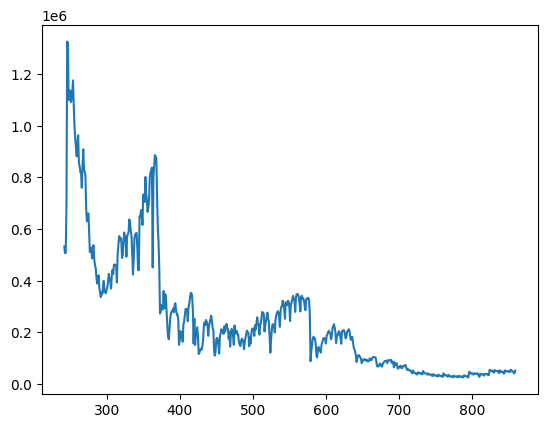

In [89]:
filtrada_LA["Players"].plot(); #como que de 300K pasa a menos de 100k? ahi hay dos caidas muy bruscas.
#esas caidas son importantes, vamos a filtrar mas.

In [91]:
#Buscando en google: pongo literalmente "Lost Ark Lost Players"
#salta noticia: "Lost Ark Loses Two Thirds Of Players After Bot Bans" con fecha del 12 de enero de 2023.
#vamos a filtrar por menos de 100K jugadores en nuerstra dataframe
#Usaremos los indexes de la grafica para situarnos.
filtrada_LA[filtrada_LA["Players"] < 100000]

,DateTime,Players,Average Players,Flags
579,2023-01-11 00:00:00,88972.0,63250.0,NaN
642,2023-03-15 00:00:00,85847.0,51174.0,NaN
648,2023-03-21 00:00:00,99872.0,85131.0,NaN
649,2023-03-22 00:00:00,81377.0,55824.0,NaN
650,2023-03-23 00:00:00,91792.0,71155.0,NaN
...,...,...,...,...
855,2023-10-14 00:00:00,51541.0,41692.0,NaN
856,2023-10-15 00:00:00,48581.0,40116.0,NaN
857,2023-10-16 00:00:00,45089.0,35992.0,NaN
858,2023-10-17 00:00:00,41800.0,32147.0,NaN


In [85]:
#La primera es del 01-11, o sea 11 de enero.
#Esa caida tan brusca, se debio a que habia un total de 200k bots.
#Vemos que luego hay datos del 03-15 y de ahi ya continuan...
#Aqui vemos que el 15 de marzo debio de haber otro baneo masivo de bots, y que ahi ya quedo mas estable.
#luego abordamos la bajada de jugadores constante.

In [92]:
#Vamos a ver esa bajada puntual antes de la gran caida de 200K
filtrada_LA[filtrada_LA["Players"] < 130000]

,DateTime,Players,Average Players,Flags
426,2022-08-11 00:00:00,116685.0,NaN,NaN
427,2022-08-12 00:00:00,121437.0,NaN,NaN
448,2022-09-02 00:00:00,110209.0,NaN,NaN
449,2022-09-03 00:00:00,125197.0,NaN,NaN
454,2022-09-08 00:00:00,118215.0,NaN,NaN
...,...,...,...,...
855,2023-10-14 00:00:00,51541.0,41692.0,NaN
856,2023-10-15 00:00:00,48581.0,40116.0,NaN
857,2023-10-16 00:00:00,45089.0,35992.0,NaN
858,2023-10-17 00:00:00,41800.0,32147.0,NaN


In [87]:
#es posible que el 17 de noviembre hubiese otra ban wave, pero no veo mas en google.
#Es posible que fuese otro baneo de bots, pero que no funcionase como los devs querian.
#Yo jugue al juego en su momento, y si, hubo baneo de bots, lo aviso pues por dar informacion, pero esto lo estoy intentando abordar como alguien "externo."

In [94]:
#Para la parte final:

final = jugadores_LA.iloc[640:]
final

#Justo tenemos la ultima caida, esto posiblemente ya fue el ultimo baneo de bots.

,DateTime,Players,Average Players,Flags
640,2023-03-13 00:00:00,127417.0,114430.0,NaN
641,2023-03-14 00:00:00,110921.0,93691.0,NaN
642,2023-03-15 00:00:00,85847.0,51174.0,NaN
643,2023-03-16 00:00:00,101697.0,70252.0,NaN
644,2023-03-17 00:00:00,110326.0,91902.0,NaN
...,...,...,...,...
855,2023-10-14 00:00:00,51541.0,41692.0,NaN
856,2023-10-15 00:00:00,48581.0,40116.0,NaN
857,2023-10-16 00:00:00,45089.0,35992.0,NaN
858,2023-10-17 00:00:00,41800.0,32147.0,NaN


In [ ]:
#Como ultimo analisis, los bots, el abuso de RMT para conseguir de forma barata una cantidad bestial de dinero del juego, provoco una masiva inflacion y subida de precios.
#eso provoco que al final, el 86% de los jugadores, haya abandonado el juego y que hayamos pasado de unos 100k jugadores humanos, a no mas de 30k o 50k en dias buenos.
#Esto no es solo el problema de bots, el contenido del juego poco a poco se empezo a volver mas intenso y dificil, eso tambien ha influenciado bastante en el hecho de que el juego haya envejecido mal.

In [96]:
#Para ultimo analisis de este notebook, miremos los jugadores de Elden Ring.
#en el notebook de darksouls tengo la dataframe con las ventas hasta 2016, elden ring salio en 25 de febrero de 2022
#vamos a ver su lanzamiento.

df = pd.read_csv("Elden Ring jugadores.csv", sep=";")
df

,DateTime,Players,Flags
0,2022-02-24 00:00:00,559624,NaN
1,2022-02-25 00:00:00,764835,NaN
2,2022-02-26 00:00:00,861538,NaN
3,2022-02-27 00:00:00,891638,NaN
4,2022-02-28 00:00:00,819143,NaN
...,...,...,...
596,2023-10-13 00:00:00,56180,NaN
597,2023-10-14 00:00:00,66989,NaN
598,2023-10-15 00:00:00,66860,NaN
599,2023-10-16 00:00:00,57215,NaN


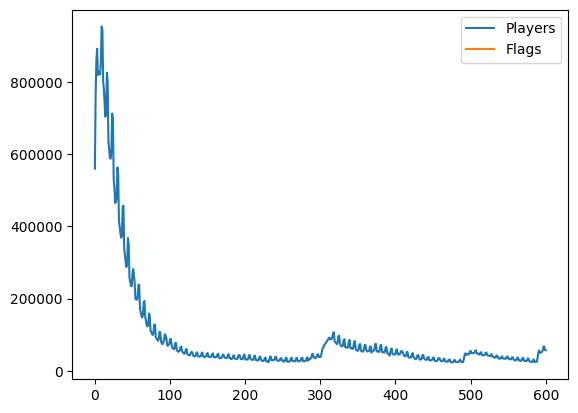

In [97]:
#Ya esta con un dia de antelacion, posiblemente por early access.
#Hagamos el plot directamente.

df.plot();

In [ ]:
#Esto es totalmente notmal en un juego single player, pero lo gracioso y lo que me llama la atencion, es que un juego single player, que no ha recibido DLC, tiene mas jugadores que uno multijugador con actualizaciones.